<a href="https://colab.research.google.com/github/alejandrazuleta1/analisis-pca-emg/blob/main/Mini_proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRATAMIENTO DE SEÑALES III**

**Mini-proyecto 2: Modelos de variable latente para el reconocimiento de acciones motoras**

**Facultad de Ingeniería**

**Universidad de Antioquia**

*Alejandra Zuleta Gónzalez, Santiago Patiño Guerrero y Natalia Pérez Puentes*

*2021-2*

In [1]:
#Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.naive_bayes import GaussianNB
from ipywidgets import interact
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-C0Ayr5be8yx0Zo6QtbJz0d33aZFjpZu' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-C0Ayr5be8yx0Zo6QtbJz0d33aZFjpZu" -O completo.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-HcTOJGHeSGyTohj5dWs4RX4ldBfHymj' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-HcTOJGHeSGyTohj5dWs4RX4ldBfHymj" -O mejores.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H5RgfvdP72OWdGyAd6Lm9m-Z0vutrwhH' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1H5RgfvdP72OWdGyAd6Lm9m-Z0vutrwhH" -O sujeto3.csv && rm -rf /tmp/cookies.txt


In [3]:
df_completo = pd.read_csv('completo.csv') #3402x62
df_mejores = pd.read_csv('mejores.csv') #3402x19
df_sujeto3 = pd.read_csv('sujeto3.csv') #1134x62

X_completo = df_completo.iloc[:,:61]
X_mejores = df_mejores.iloc[:,:18]
X_sujeto3 = df_sujeto3.iloc[:,:61]

y = df_mejores.iloc[:,18:19]
y_sujeto3 = df_sujeto3.iloc[:,61:62]

# PCA

Con el siguiente código interactivo se realiza la comparación del desempeño obtenido al implementar un clasificador bayesiano utilizando tanto los datos de entrenamiento la matriz característica como su proyección en el espacio latente (en el cual se varía el número de variables o componentes con las cuales se va a describir el conjunto de datos original).

Adicionalmente, se añade en la comparación solo las características generadas por el sujeto 3, el cual según los resultados del miniproyecto 1, presenta mayor separabilidad de las observaciones que los otros dos sujetos.

Dado que el data set cuenta con 61 características, si se seleccionan todos los datos o solo los del sujeto 3, el número de componentes tambien tiene este límite como cota superior. Sin embargo, si se seleccionan solo los datos con las mejores características, tomadas del miniproyecto 1, el límite para el número de componentes en el espacio lantente es 18.

**NOTA:** En la variable *datos* se encuentran los 3 datasets con los que se realiza el análisis y en la variable *Flag_Space* se puede escoger el espacio de visualización de los datos (PCA o Entrada). También se cuenta con una variable llamada *n_componentes* con la cual se puede variar la cantidad de componentes q en el espacio latente.



In [4]:
@interact(Datos = ['Todos','Mejores características','Sujeto3'], Flag_Space = ['PCA','Entrada'], n_componentes=(1,61,1))
def ExperimentoBayes(Datos, Flag_Space,n_componentes):
  
  if Datos == 'Todos':
    X = df_completo.iloc[:,:61]
    y = df_mejores.iloc[:,-1]
  elif Datos == 'Mejores características':
    X = df_mejores.iloc[:,:18]
    y = df_mejores.iloc[:,-1]
  else: 
    X = df_sujeto3.iloc[:,:61]
    y = df_sujeto3.iloc[:,-1]

  perc_variables = n_componentes/61 * 100
  print("percent variables used: ", np.round(perc_variables,3))

  pca = PCA(n_components=int(n_componentes))
  X_pca = pca.fit_transform(X) # Transformamos los datos al espacio latente
  print("original shape:   ", X.shape)
  print("transformed shape:", X_pca.shape)

  if Flag_Space == 'PCA':
    X = X_pca

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
  
  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test) * 100
  print('Acc(%): ',porcentajeAcierto)

  if Flag_Space =='PCA':
    plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
    plt.title('Var explained normalized')
    plt.grid()
    plt.show()
  
  ax = ConfusionMatrixDisplay(CMAT)#,display_labels=y_test])
  ax.plot()

interactive(children=(Dropdown(description='Datos', options=('Todos', 'Mejores características', 'Sujeto3'), v…

## Observaciones

- Según la gráfica de varianza explicada normalizada, con 4 o 5 componentes en el espacio latente ya se tiene la mayor parte de la información utilizando todos los datos y todas las características, sin embargo el desempeño aumenta un poco al incrementar el número de componentes hasta 24, ya que a partir de este valor el incremento en el desempeño no es mucho.

- Utilizando todos los datos y todas las características, la precisión del clasificador es de 57.39% con los datos de entrada. Mientras que utilizando el espacio latente, con diferente número de características solo se alcanza una precisión del 56.4%.

- Se obtiene que para el caso de los datos con las mejores características, la precisión solo alcanza el 53.08% y que al menos 4 componentes tienen la mayor varianza para representar los datos. También se destaca que a partir de 9 componentes el desempeño no muestra ningún cambio. En el espacio de entrada, con estos datos se obtiene una precisión de 47.4%.

- Se observa que para el sujeto 3, la precisión del modelo de clasificación mejora notablemente, puesto que el 57% de precisión lo obtiene con solo 12 componentes; y con 23 componentes obtiene una precisión máxima del 72.72%. También se destaca que a partir de 24 componentes el desempeño disminuye a 71.8% y se mantiene en este valor hasta el máximo de componentes posibles. En cuanto al espacio de entrada, se obtiene un desempeño del 72.43%.

### Modelo de visualización de pares 
A continuación, se toma el mejor resultado del espacio latente utilizando todas las características de los 3 sujetos y se muestra un modelo de visualización de pares utilizando el número de componentes con mayor varianza. En este caso se utilizan 5 componentes para la visualización.

transformed shape: (3402, 5)


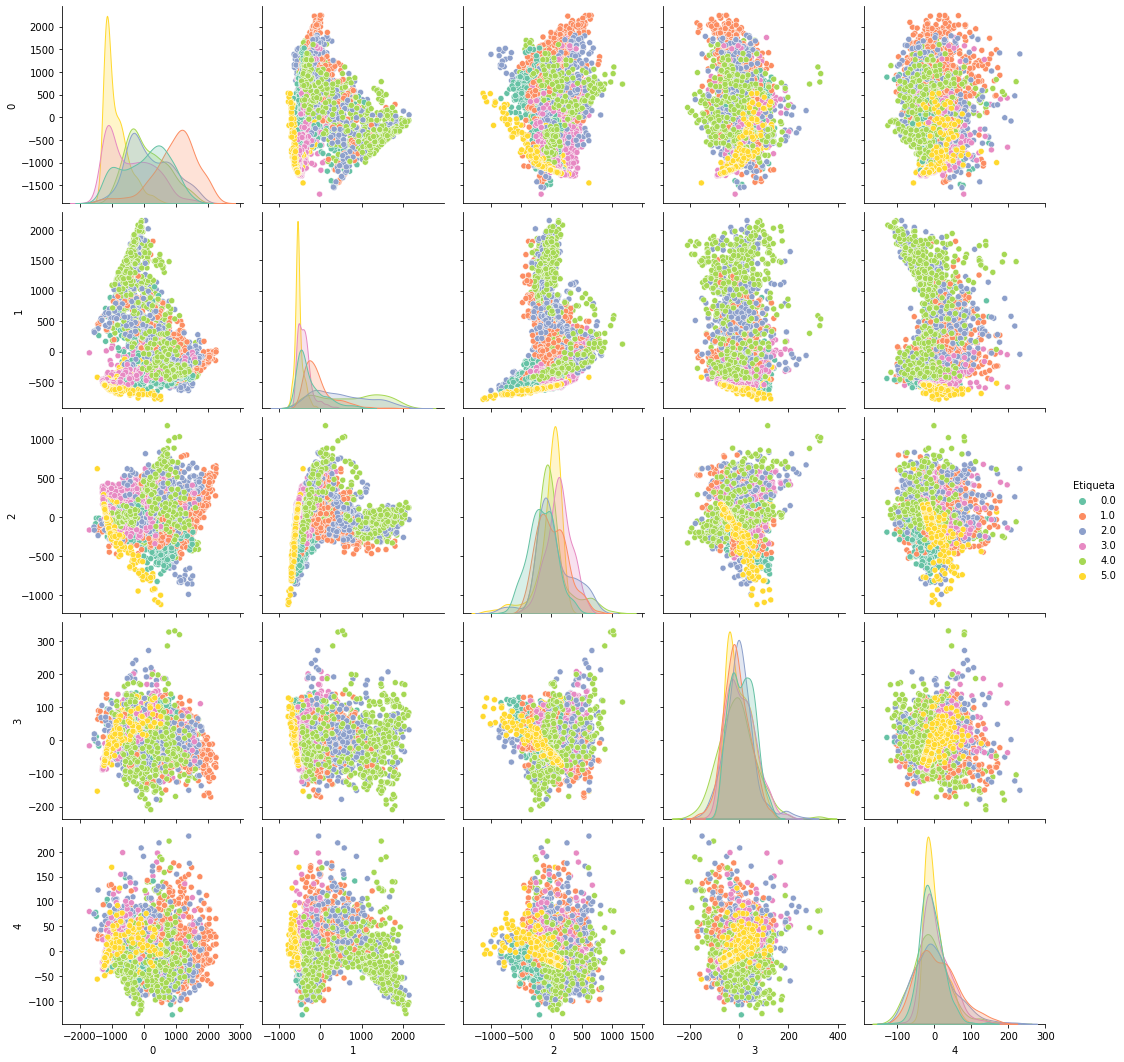

In [13]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_completo) # Transformamos los datos al espacio latente
print("transformed shape:", X_pca.shape)

data_completo = pd.DataFrame(data=X_pca)
data_completo['Etiqueta'] = y
sns.pairplot(data_completo, hue="Etiqueta", height=3, palette = sns.color_palette("Set2",6))

En el caso de las características 2,3 y 4 se muestra que todas las gaussianas de la gráfica de distribución presente en la diagonal principal están centradas en cero, por lo que es consecuente no ver mucha separabilidad entre los grupos de datos. En el caso del color azul correspondiente al movimiento 3, los datos en todas las gráficas se ven muy dispersos. En el caso de las características 0, 1 y 2, se muestra que el amarillo correspondiente al movimiento 6 tiene mayor separabilidad que los otros movimientos.

# Kernel PCA

En este caso se vuelve a proyectar la matriz característica pero esta vez utilizando una función de mapeo o kernel no lineal (en este caso polinomial, de base radial o rbf, sigmoidal o cosenoidal y la lineal que sería equivalente a PCA).

**NOTA:** 
- En la variable *datos* se puede escoger entre 3 opciones de dataset: todos que tienen todas las variables y todas las observaciones de los 3 sujetos de interés, *mejores características* que tiene las 18 características que mostraron tener más influencia en el desarrollo del mini-proyecto 1 y las observaciones de los 3 sujetos y *Sujeto 3* que contiene todas las características y observaciones de este sujeto en particular. 

- En la variable *Flag_Space* se puede escoger el espacio de análisis de los datos (el de entrada o kernel PCA). 

- En la variable kernel se puede escoger el tipo familia de funciones base a utilizar.

- En la variable gamma (aplicable a los kernels rbf, poly y sigmoid) se puede variar el coeficiente de kernel.

- Con la variable degree se puede variar el grado en el caso del kernel polinomial.

- Con la variable n_componetes se puede variar el número de componente para la función lineal (equivalente a PCA y con máximo 61 componentes) y la función sigmoidal.

In [6]:
@interact(Datos = ['Todos','Mejores características','Sujeto 3'], 
          Flag_Space = ['Kernel_PCA','Entrada'], 
          kernel=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'], 
          gamma=(1,30,1), #rbf,poly,sigmoide
          degree=(1,10,1), #poly
          ncomponents=(1,100,1))
def ExperimentoBayes(Datos, Flag_Space,kernel,gamma,degree,ncomponents):
  
  if Datos == 'Todos':
    X = df_completo.iloc[:,:61]
    y = df_mejores.iloc[:,-1]
  elif Datos == 'Mejores características':
    X = df_mejores.iloc[:,:18]
    y = df_mejores.iloc[:,-1]
  else: 
    X = df_sujeto3.iloc[:,:61]
    y = df_sujeto3.iloc[:,-1]
  
  if (kernel == 'sigmoid' or kernel == 'linear'):
    kernel_pca = KernelPCA(n_components=ncomponents, kernel=kernel, gamma=gamma)
  elif (kernel == 'poly'):
    kernel_pca = KernelPCA(n_components=None, kernel=kernel, degree=degree)
  else :
    kernel_pca = KernelPCA(n_components=None, kernel=kernel, gamma=gamma)
  
  X_test_kernel_pca = kernel_pca.fit_transform(X)

  print("original shape:   ", X.shape)
  print("transformed shape:", X_test_kernel_pca.shape)

  if Flag_Space == 'Kernel_PCA':
    X = X_test_kernel_pca
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test) * 100
  print('Acc(%): ',porcentajeAcierto)

  if Flag_Space == 'Kernel_PCA':
    explained_variance = np.var(X, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_accumulated=np.cumsum(explained_variance_ratio)
    plt.plot(explained_variance_accumulated)
    plt.title('Var explained normalized')
    plt.grid()
    plt.show()

  ax = ConfusionMatrixDisplay(CMAT)#,display_labels=y_test])
  ax.plot()

interactive(children=(Dropdown(description='Datos', options=('Todos', 'Mejores características', 'Sujeto 3'), …

## Observaciones:

- Dentro de los parámetros que se pueden variar al utilizar el método KernelPCA, se evidenció que para la etapa de proyección al espacio latente, el parámetro alpha no es influyente, debido a que este hiperparámetro se utiliza es en la transformada inversa (del espacio latente al espacio original de los datos) y en este caso no se está utilizando.

- Utilizando el kernel lineal se obtienen los mismos resultados que con PCA (como es de esperarse): para los datos con todas las características el cual obtiene una precisión máxima del 56.41% utilizando 25 componentes; para el conjunto con las mejores características con un 53.08% de precisión y para el sujeto 3 que consigue una precisión del 72.72%.

- El kernel cosine, mapea el conjunto de los datos con todas las características a un espacio latente de 37 componentes y obtiene un 57.19% de precisión en el modelo de clasificación. 
  Se observa que en el caso de los datos con las mejores características, se mapea a un espacio con 1609 componentes y obtiene una precisión de 62.68%. Mientras que para el sujeto 3, se obtiene una precisión del 68.62% y un espacio latente de 37 componentes.
En este caso, la inclusión de las normas en la formulación matemática del kernel, no mejora la precisión con respecto a la función lineal.

- Como se esperaba, al utilizar el kernel poly con un grado igual a 1, las precisiónes obtenidas, en los diferentes conjuntos de datos y características son practicamente iguales al caso lineal. 
Analizando el caso del sujeto 3, se logra obtener la mejor precisión con el grado del polinomio en 3, llegando a 62.75% de precisión y mapeando a un espacio de 50 componentes. En ninguno de los casos al aumentar el grado del polinomio se obtiene un mejor desempeño que en el caso lineal.

- En el caso de la función sigmoid, no se obtiene un desempeño mayor al 14.26% utilizando todos los datos o las mejores caracterpisticas ni al variar el número de componentes ni el parámetro gamma. En cuanto al sujeto 3, se obtiene un desempeño del 13.19%. Según la matriz de confusión todos los movimientos se están clasificando como uno solo (en este caso el 0 correspondiente al movimiento 1).

- Para el kernel rbf, se obtiene la mejor clasificación utilizando todas las caracteristicas y el parámetro gamma con un valor de 2 y utilizando 3401 componentes en el espacio latente (que resulta ser el óptimo encontrado en este caso), llegando al 90.98% de precisión. Por otro lado, para el sujeto 3, la mejor clasificación se da con valor de gamma de 5 utilizando 1133 componentes en el espacio latente, con un 92.66% de precisión. En ambos casos la gráfica de varianza explicada normalizada tiene un comportamiento lineal hasta la última componente. En el caso de los datos correspondientes a las mejores características, se obtiene un desempeño máximo de 38% con un gamma de 13 y utilizando 3388 componentes y la gráfica de varianza explicada normalizada ya no es lineal.

- La variable gamma tiene mayor influencia en el kernel tipo rbf que en el polinomial o en el sigmoidal. En el caso del poliomial, lo que más influye es el grado del polinomio y no dicha variable. En general, los valores altos de gamma no mejoran ni empeoran los resultados en el caso de la función sigmoidal y de la polinomial.

### Modelo de visualización de pares 
A continuación se muestra un modelo de visualización de pares utilizando el kernel rbf con los parámetros con los que se obtuvieron los mejores resultados para el dataset que contiene las 62 características de los 3 sujetos. En este caso se utilizan las primeras 10 componentes de 3401 para la visualización.

transformed shape: (3402, 3401)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


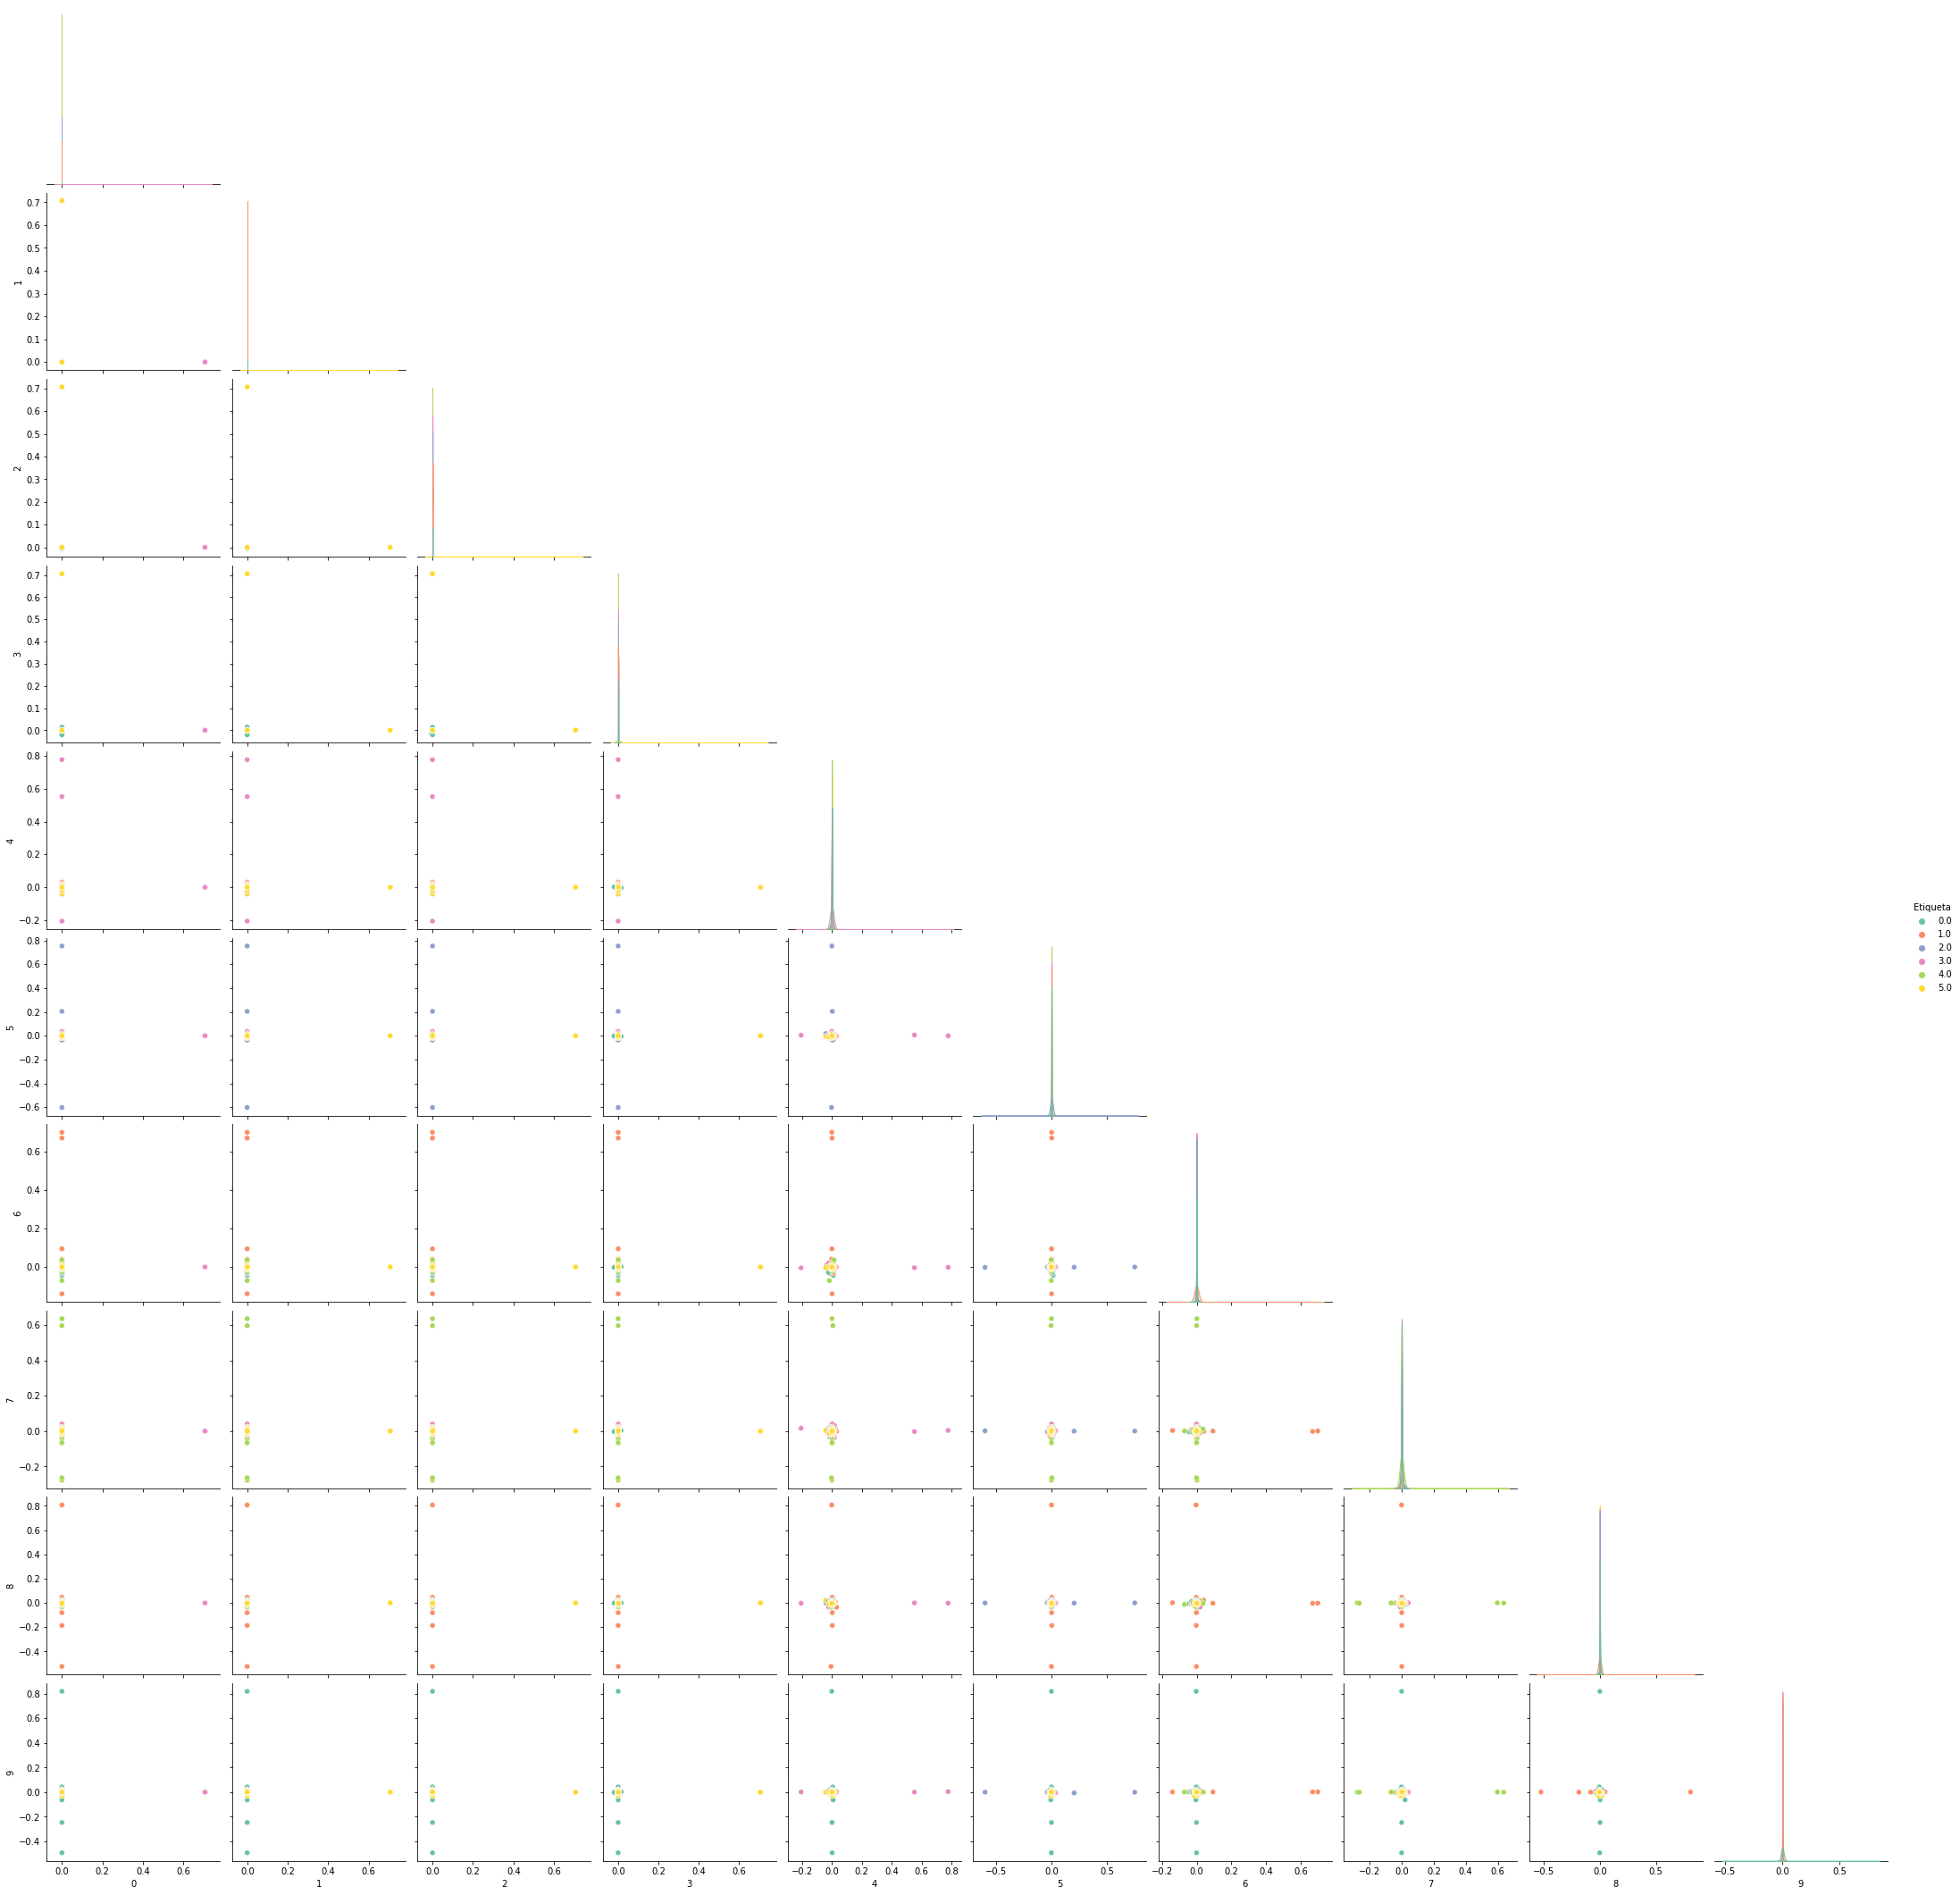

In [4]:
kernel_pca = KernelPCA(n_components=None, kernel='rbf', gamma=2)
X_test_kernel_pca = kernel_pca.fit_transform(X_completo)
print("transformed shape:", X_test_kernel_pca.shape)

data_completo = pd.DataFrame(data=X_test_kernel_pca)
data_primeras10 = data_completo.iloc[:,:10]
data_primeras10['Etiqueta'] = y

sns.pairplot(data_primeras10, hue="Etiqueta", height=3, palette = sns.color_palette("Set2",6),corner=True)

En general, se muestra una mayor separabilidad de los tipos de movimiento e incluso se alcanzan a visualizar todos (pero no en la misma gráfica). Hay algunos casos donde hay datos que se siguen solapando, sobretodo cuando se aumenta el número de características (de la 3 en adelante) pero igual se sigue visualizando la separabilidad de otros movimientos. Tambien cabe destacar que en este nuevo espacio los datos no están distribuidos por todo el espacio como se observaba en el gráfico de pares utilizando las componentes de PCA, sino que en la mayoría de casos se concentran en uno o varios puntos específicos y esto se sigue manteniendo a lo largo de las gráficas. Por ejemplo en la característica 5 se puede ver como siempre el color azul (movimiento 3) conserva la misma posición a lo largo de los gráficos de esa fila; o en la característica 4 con el color amarillo (movimiento 6) y rosado (movimiento 4) pasa lo mismo, se conserva en puntos específicos la distribución de estos colores y esto pasa con varias de las características.

# Conclusiones

- Se observa que no necesariamente al proyectar los datos a un espacio latente se obtienen mejores resultados en la clasificación, esto dependerá mucho de la familia de funciones base que se utilice y en ocasiones se obtienen mejores resultados con la función lineal (PCA) que con otras familias de funciones.

- En el caso de PCA el límite de variables son las variables del espacio original, pero cuando se utiliza una función de mapeo o kernel, este optimiza y encuentra el número de variables más adecuado (con más precisión). En el caso de la función  rbf con la que se obtuvieron los mejores resultados tanto para todos los sujetos como para el sujeto 3 con todas las características, se evidencia que la cantidad de variables a utilizar en el espacio latente tiene una dimensión comparable con la cantidad de observaciones de cada caso, pero esto varía dependiendo de cada función de mapeo.

- En el caso de la función sigmoidal, fue la que menos se acomodó al problema clasificando todos los movimientos como uno solo.

- Con los datos correspondientes al sujeto 3, se obtienen los mejores resultados. Esto se puede explicar ya que el clasificador tienen ejemplos de una misma persona y no de 3 personas diferentes que como se observó en el mini-proyecto 1 pueden mostrar mayor separación entre diferentes tipos de movimientos. Se decide usar este dataset para poder comparar entre los resultados de 3 sujetos y de 1 solo sujeto, ya que lo ideal es que el clasificador sepa que tipo movimiento es independiente de la persona que lo realice, pero se sigue notando que para algunas funciones de mapeo es más dificil realizar la clasificación con ejemplos de diferentes personas.

  Cabe destacar que en el caso de kernel rbf con gamma igual a 2, en la mayoría de combinaciones del gráfico de pares (por lo menos de las primeras 10 carcaterísticas) se logran separar los tipos de movimiento independiente de que se tengan muestras de 3 sujetos y estos tienden a concentrarse en puntos específicos.

- A lo largo de las diferentes pruebas utilizando diferentes tipos de funciones base, se evidencia que aunque a simple vista hay variables que no aportan mucha información esto cambia al ingresarlas a un clasificador (ya sea mapeadas a un espacio latente o en el espacio de entrada), donde siempre se obtuvieron mejores resultados utilizando todas las variables que utilizando las características con mayor separabilidad de las clases (las mejores 18 características extraídas del mini-proyecto 1).